In [1]:
from astropy.io import fits
from astropy.table import Table
from astropy.wcs import WCS
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

In [2]:
# Read in the mock catalog
mock_cat = Table.read('Data_Repository/Project_Data/SPT-IRAGN/MCMC/Mock_Catalog/Catalogs/Port_Rebuild_Tests/eta_zeta_slopes/targeted_snr/snr_0.68/mock_AGN_catalog_t0.100_e4.00_z-1.00_b1.00_rc0.100_C0.158_maxr5.00_seed3775_15x1.0_photComp_tez_grid.fits')
mock_cat = mock_cat.group_by('SPT_ID')

In [3]:
mock_cluster = mock_cat.groups[12]
center = mock_cluster['SZ_RA', 'SZ_DEC'][0]
cluster_agn = mock_cluster[mock_cluster['CLUSTER_AGN'].astype(bool)]
background = mock_cluster[~mock_cluster['CLUSTER_AGN'].astype(bool)]

In [4]:
mask = mock_cluster['MASK_NAME'][0]
img, hdr = fits.getdata(mask, header=True)
wcs = WCS(hdr)

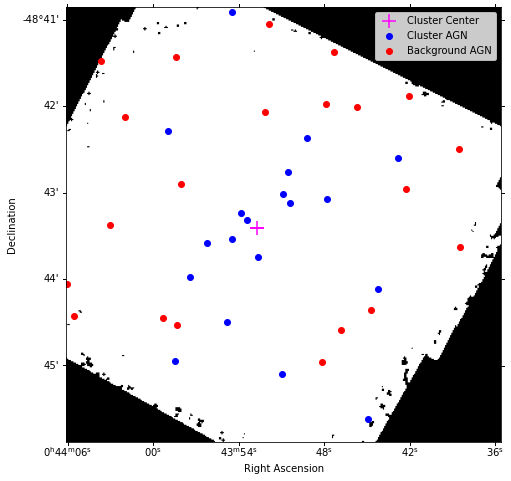

In [6]:
fig, ax = plt.subplots(subplot_kw=dict(projection=wcs), figsize=(8, 8))
ax.imshow(img, cmap='Greys_r', origin='lower')
ax.scatter(center['SZ_RA'], center['SZ_DEC'], marker='+', s=200, c='magenta', label='Cluster Center', transform=ax.get_transform('world'))
ax.scatter(cluster_agn['RA'], cluster_agn['DEC'], marker='o', c='b', label='Cluster AGN', transform=ax.get_transform('world'))
ax.scatter(background['RA'], background['DEC'], marker='o', c='r', label='Background AGN', transform=ax.get_transform('world'))
ax.legend()
ax.set(xlabel='Right Ascension', ylabel='Declination')
fig.savefig('Data_Repository/Project_Data/SPT-IRAGN/Publication_Plots/mock_cluster_example.png')